<a href="https://colab.research.google.com/github/amy165/Miscellaneous/blob/main/Data_Wrangling_%26_EDA_con_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA DE PROGRAMACIÓN Nº 1. IMPORTAR EL CONJUNTO DE DATOS Y REALIZAR UN ANÁLISIS ESTADÍSTICO BÁSICO DE LOS DATOS

In [ ]:
# Importar biblioteca Pandas
import pandas as pd

In [ ]:
# Forzar Pandas a mostrar todas las filas y columnas
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Leamos un archivo CSV utilizando Pandas de la siguiente manera
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
# Obtengamos el tipo de los datos
type(hr_df)

In [ ]:
# Puedes ver las primeras filas utilizando .head()
hr_df.head(6)

In [ ]:
# Puedes ver las últimas filas utilizando .tail()
hr_df.tail(4)

In [ ]:
# Calculamos los valores medios del dataframe employee_df
hr_df.mean()

In [ ]:
# 35 características en total
hr_df.info()

In [ ]:
# Obtener un resumen estadístico sobre los datos
hr_df.describe()

**OPORTUNIDAD PRÁCTICA #1 [OPCIONAL]:**
- **Calcula la edad media, máxima y mínima de los empleados considerados en este estudio utilizando una estrategia diferente**

# TAREA DE PROGRAMACIÓN #2. TRATAR LOS DATOS FALTANTES

In [ ]:
hr_df

In [ ]:
# Vamos a localizar las filas que tienen valores Nulos
# Observa que el índice de la fila 6 tiene muchos valores perdidos
hr_df.isnull()

In [ ]:
# Veamos el número total de elementos que faltan por columna
hr_df.isnull().sum()

In [ ]:
# Eliminar cualquier fila que contenga un valor Nulo
# Observa que el tamaño del dataframe se ha reducido en 7 elementos, de 1470 a 1463.
hr_df.dropna(how = 'any', inplace = True)

In [ ]:
# Observa que la fila 1, por ejemplo, ya no existe.
hr_df

In [ ]:
# Comprobemos si aún nos falta algún valor
hr_df.isnull().sum()

In [ ]:
# Exploremos un método alternativo (más inteligente) para tratar los valores perdidos
# Volvamos a leer los datos brutos usando Pandas de la siguiente manera
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
# Calcular los ingresos medios mensuales
hr_df['MonthlyIncome'].mean()

In [ ]:
# Podemos utilizar Fillna para rellenar una columna determinada con un valor determinado
hr_df["MonthlyIncome"].fillna(hr_df['MonthlyIncome'].mean(), inplace = True)

In [ ]:
hr_df

**OPORTUNIDAD PRÁCTICA #2 [OPCIONAL]:**
- **Calcule la mediana de la tasa mensual. Utiliza los valores medios calculados para completar los datos que faltan. Confirma que el proceso se ha realizado correctamente**

# TAREA DE PROGRAMACIÓN #3: REALIZAR UN ONE-HOT ENCODING

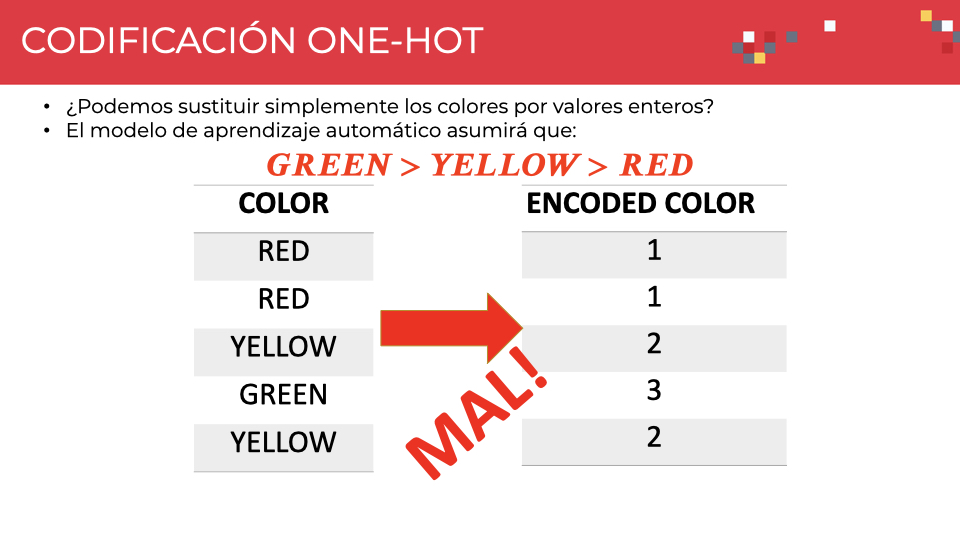

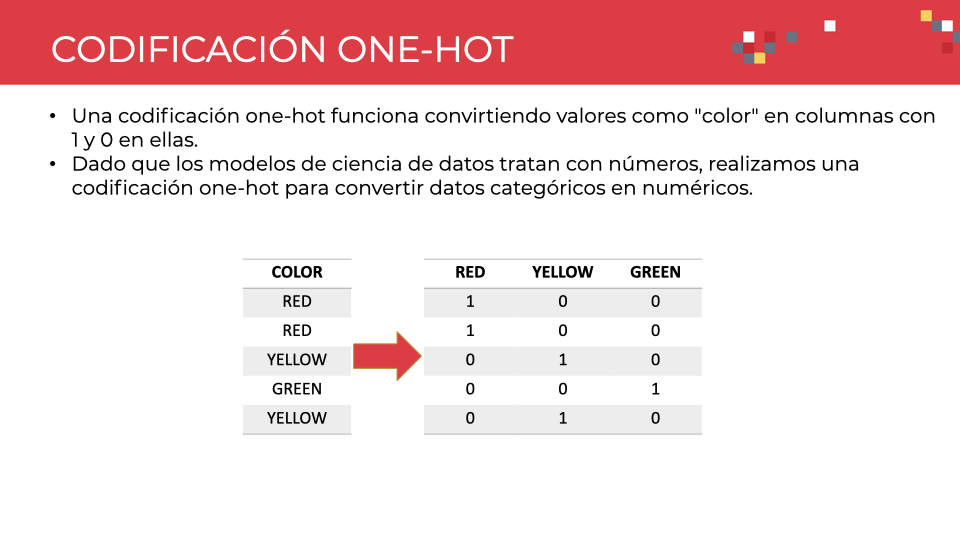

In [ ]:
#Leamos un archivo CSV utilizando Pandas de la siguiente manera
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
hr_df['BusinessTravel'].unique()

In [ ]:
hr_df['BusinessTravel']

In [ ]:
BusinessTravel_Encoded = pd.get_dummies(hr_df['BusinessTravel'])
print(BusinessTravel_Encoded)

**OPORTUNIDAD PRÁCTICA #3 [OPCIONAL]:**
- **Importa los datos de Recursos Humanos y elimina todos los valores que faltan.**
- **¿Cuántas categorías únicas existen en la columna "Educación"?**
- **Realiza una codificación one-hot en la columna Educación.**

# TAREA DE PROGRAMACIÓN #4: REALIZAR ESCALADOS (NORMALIZACIÓN & ESTANDARIZACIÓN)

In [ ]:
# Leamos un archivo CSV utilizando Pandas de la siguiente manera
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
hr_df['Age'].values

In [ ]:
# La normalización se realiza para que los valores de las características oscilen entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hr_df['Age'] = scaler.fit_transform(hr_df['Age'].values.reshape(-1,1))

In [ ]:
hr_df['Age']

In [ ]:
hr_df.describe()

**OPORTUNIDAD PRÁCTICA #4 [OPCIONAL]:**
- **Realiza el escalado de características mediante la estandarización (Recordemos que la normalización se lleva a cabo para transformar los datos para que tengan una media de cero y una desviación estándar de 1).**
- **Realiza una comprobación para asegurarse de que la transformación se ha realizado correctamente.**

# TAREA DE PROGRAMACIÓN #5. OPERACIONES/FILTRADO DE PANDAS

In [ ]:
# Leamos un archivo CSV utilizando Pandas de la siguiente manera
hr_df = pd.read_csv('Human_Resources.csv')

In [ ]:
# Elegir determinadas filas que cumplan un determinado criterio
loyal_employees_df = hr_df[ (hr_df['YearsAtCompany'] >= 30) ]
loyal_employees_df

In [ ]:
# Elija determinadas filas que satisfagan 2 o más criterios

mask_1 = hr_df['YearsAtCompany'] >= 30
mask_2 = hr_df['Department'] == 'Research & Development'

loyal_rnd_df = hr_df[mask_1 & mask_2 ]
loyal_rnd_df

In [ ]:
# Valores comprendidos entre un intervalo determinado
hr_df[hr_df["DailyRate"].between(800, 850)]

**OPORTUNIDAD PRÁCTICA #5 [OPCIONAL]**
- **Utilizando el DataFrame "hr_df", aprovecha las operaciones de pandas para seleccionar sólo los individuos con un DailyRate alto (1450+)**.
- **¿Cuál es el DailyRate combinado para todos los empleados con 1450+?**

# TAREA DE PROGRAMACIÓN #6: REALIZAR UN EDA BÁSICO EN AMBAS CLASES

In [ ]:
hr_df

In [ ]:
hr_df.info()

In [ ]:
# Tiene sentido eliminar 'EmployeeCount', 'Standardhours' y 'Over18' ya que no cambian de un empleado a otro
# Eliminemos también 'EmployeeNumber
hr_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [ ]:
hr_df.info()

In [ ]:
# Veamos cuántos empleados abandonaron la empresa.
left_df = hr_df[hr_df['Attrition'] == 'Yes']

In [ ]:
# Visualicemoslos
left_df

In [ ]:
left_df.describe()

**OPORTUNIDAD PRÁCTICA #6 [OPCIONAL]**
- **Filtrar el hr_df para incluir sólo a los empleados que permanecieron en la empresa.**
- **Generar un resumen estadístico para los empleados que se quedaron en la empresa.**
- **Comparar ambos resúmenes estadísticos. ¿Qué se deduce de los datos?**

# TAREA DE PROGRAMACIÓN Nº 7. PANDAS CON FUNCIONES

In [ ]:
# Leamos un archivo CSV utilizando Pandas de la siguiente manera
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
# Supongamos que el daily rate ha aumentado un 10%.
# Definamos una función que aumente el patrimonio de todos los clientes en un valor fijo del 10% (por simplicidad)
def dailyrate_update(balance):
    return balance * 1.1 # Supongamos que el patrimonio neto aumenta un 10%.

In [ ]:
# Podemos aplicar una función al DataFrame
hr_df['DailyRate'] = hr_df['DailyRate'].apply(dailyrate_update)
hr_df

**OPORTUNIDAD PRÁCTICA #7 [OPCIONAL]**
- **Definir una función que duplique la TasaDiaria y añada 100$.**
- **Aplicar la función al DataFrame.**
- **Calcular la Tasa Diaria total actualizada de todos los empleados combinados.**

1179654

# TAREA DE PROGRAMACIÓN #8: HISTOGRAMA Y CORRELACIÓN

In [ ]:
hr_df.hist(bins = 30, figsize = (20,20), color = 'r');
# Varias funciones como "MonthlyIncome" y "TotalWorkingYears" son de cola larga.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations = hr_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
# El nivel de empleo está fuertemente correlacionado con el total de horas trabajadas
# Los ingresos mensuales están fuertemente correlacionados con el nivel de empleo
# Los ingresos mensuales están fuertemente correlacionados con el total de horas de trabajo
# La edad está fuertemente correlacionada con los ingresos mensuales

**OPORTUNIDAD PRÁCTICA #8 [OPCIONAL]:**
- **Cambia el color del heatmap [Se requiere investigación externa]**

# BUEN TRABAJO!

# RESUMEN DEL PROYECTO FINAL

- En este proyecto, realizaremos un Análisis Exploratorio de Datos (EDA) básico sobre el conjunto de datos de la enfermedad cifosis.
- La cifosis es una curvatura convexa anormalmente excesiva de la columna vertebral.
- El conjunto de datos contiene 81 filas y 4 columnas que representan datos sobre niños que se han sometido a cirugía correctiva de la columna vertebral.
    - ENTRADAS: 1. Edad: en meses, 2. Número: el número de vértebras afectadas, 3. Inicio: el número de la primera vértebra (la más alta) operada.
    - SALIDAS: Cifosis que representa un factor con niveles ausentes presentes que indica si se presentó una cifosis (un tipo de deformación) después de la operación.
- Utilizando el archivo "kyphosis.csv" incluido en el paquete del curso, escribe un script de python para realizar las siguientes tareas:
    1. 1. Importar el archivo "cifosis.csv" utilizando Pandas
    2. 2. Realizar un análisis exploratorio de datos (AED) básico de los datos       
    3. Enumerar la edad media, mínima y máxima (en años) considerada en este estudio utilizando 2 métodos
    4. Representar la matriz de correlaciones
    5. Convierte el tipo de datos de la columna edad de int64 a float64
    6. Definir una función que convierta la edad de meses a años
    7. Aplicar la función a la columna "Edad" y añadir los resultados en una nueva columna titulada "Edad en años"
    8. Cuáles son las características del niño mayor y del menor de este estudio?
    9. Escala la columna "Edad" sin procesar (en meses) utilizando tanto la estandarización como la normalización. Realice una comprobación de sanidad.


# SOLUCIÓN DEL PROYECTO FINAL

In [ ]:
Kyphosis_df = pd.read_csv("kyphosis.csv")

In [ ]:
Kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [ ]:
Kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
Kyphosis_df['Age'].mean()/12

6.97119341563786

In [ ]:
Kyphosis_df['Age'].min()/12

0.08333333333333333

In [ ]:
Kyphosis_df['Age'].max()/12

17.166666666666668

In [ ]:
Kyphosis_df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

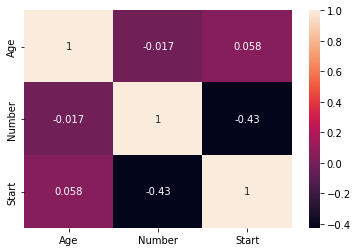

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(Kyphosis_df.corr(), annot=True);

In [ ]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
# Let's convert the Age datatype from int64 to float64
Kyphosis_df["Age"] = Kyphosis_df["Age"].astype("float64")
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kyphosis  81 non-null     object 
 1   Age       81 non-null     float64
 2   Number    81 non-null     int64  
 3   Start     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


In [ ]:
def month_to_year(age):
    return age /12

In [ ]:
# You can apply a function to the DataFrame
Kyphosis_df['Age in Years'] = Kyphosis_df['Age'].apply(month_to_year)
Kyphosis_df

,Kyphosis,Age,Number,Start,Age in Years
0,absent,71.0,3,5,5.916667
1,absent,158.0,3,14,13.166667
2,present,128.0,4,5,10.666667
3,absent,2.0,5,1,0.166667
4,absent,1.0,4,15,0.083333
...,...,...,...,...,...
76,present,157.0,3,13,13.083333
77,absent,26.0,7,13,2.166667
78,absent,120.0,2,13,10.000000
79,present,42.0,7,6,3.500000


In [ ]:
Kyphosis_df[ Kyphosis_df["Age"] == Kyphosis_df["Age"].max() ]


,Kyphosis,Age,Number,Start,Age in Years
73,absent,206.0,4,10,17.166667


In [ ]:
Kyphosis_df[ Kyphosis_df["Age"] == Kyphosis_df["Age"].min() ]

,Kyphosis,Age,Number,Start,Age in Years
4,absent,1.0,4,15,0.083333
5,absent,1.0,2,16,0.083333
13,absent,1.0,4,12,0.083333
15,absent,1.0,3,16,0.083333
36,absent,1.0,3,9,0.083333


In [ ]:
# Normalization is conducted to make feature values range from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Kyphosis_df['Age'] = scaler.fit_transform(Kyphosis_df['Age'].values.reshape(-1,1))

In [ ]:
Kyphosis_df.describe()

,Age,Number,Start,Age in Years
count,81.000000,81.000000,81.000000,81.000000
mean,0.403192,4.049383,11.493827,6.971193
std,0.283435,1.619423,4.883962,4.842021
min,0.000000,2.000000,1.000000,0.083333
25%,0.121951,3.000000,9.000000,2.166667
50%,0.419512,4.000000,13.000000,7.250000
75%,0.629268,5.000000,16.000000,10.833333
max,1.000000,10.000000,18.000000,17.166667


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Kyphosis_df['Age'] = scaler.fit_transform(Kyphosis_df['Age'].values.reshape(-1,1))

In [ ]:
Kyphosis_df.describe().round(2)

,Age,Number,Start,Age in Years
count,81.00,81.00,81.00,81.00
mean,0.00,4.05,11.49,6.97
std,1.01,1.62,4.88,4.84
min,-1.43,2.00,1.00,0.08
25%,-1.00,3.00,9.00,2.17
50%,0.06,4.00,13.00,7.25
75%,0.80,5.00,16.00,10.83
max,2.12,10.00,18.00,17.17


# SOLUCIONES DE LAS ACTIVIDADES PRÁCTICAS

**OPORTUNIDAD PRÁCTICA #1 SOLUCIÓN:**
- **Calcula la edad media, máxima y mínima de los empleados considerados en este estudio utilizando una estrategia diferente**

In [ ]:
# average age = 37 years old
# min age = 18
# max age = 60

In [ ]:
hr_df['Age'].mean()

In [ ]:
hr_df['Age'].max()

In [ ]:
hr_df['Age'].min()

**OPORTUNIDAD PRÁCTICA #2 SOLUCIÓN:**
- **Calcule la mediana de la tasa mensual. Utiliza los valores medios calculados para completar los datos que faltan. Confirma que el proceso se ha realizado correctamente**

In [ ]:
# Let's read a CSV file using Pandas as follows
employee_df = pd.read_csv('Human_Resources.csv')
employee_df

In [ ]:
# first, let's locate rows that have Null values
employee_df.isnull().sum()

In [ ]:
# Calculate the average monthly income
employee_df['MonthlyRate'].median()

In [ ]:
# You can use Fillna to fill a given column with a certain value
employee_df['MonthlyRate'].fillna(employee_df['MonthlyRate'].median(), inplace = True)


In [ ]:
employee_df

In [ ]:
# first, let's locate rows that have Null values
employee_df.isnull().sum()

**OPORTUNIDAD PRÁCTICA #3 SOLUCIÓN:**
- **Importa los datos de Recursos Humanos y elimina todos los valores que faltan.**
- **¿Cuántas categorías únicas existen en la columna "Educación"?**
- **Realiza una codificación one-hot en la columna Educación.**

In [ ]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('Human_Resources.csv')
hr_df.dropna(how = 'any', inplace = True)


In [ ]:
hr_df['EducationField'].unique()

In [ ]:
EducationField_Encoded = pd.get_dummies(hr_df['EducationField'])
print(EducationField_Encoded)

**OPORTUNIDAD PRÁCTICA #4 SOLUCIÓN:**
- **Realiza el escalado de características mediante la estandarización (Recordemos que la normalización se lleva a cabo para transformar los datos para que tengan una media de cero y una desviación estándar de 1).**
- **Realiza una comprobación para asegurarse de que la transformación se ha realizado correctamente.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hr_df['Age'] = scaler.fit_transform(hr_df['Age'].values.reshape(-1,1))

In [ ]:
hr_df.describe().round(2)

**OPORTUNIDAD PRÁCTICA #5 SOLUCIÓN:**
- **Utilizando el DataFrame "hr_df", aprovecha las operaciones de pandas para seleccionar sólo los individuos con un DailyRate alto (1450+)**.
- **¿Cuál es el DailyRate combinado para todos los empleados con 1450+?**

In [ ]:
high_rate_df = hr_df[ (hr_df['DailyRate'] >= 1450) ]
high_rate_df

In [ ]:
high_rate_df['DailyRate'].sum()

**OPORTUNIDAD PRÁCTICA #6 SOLUCIÓN:**
- **Filtrar el hr_df para incluir sólo a los empleados que permanecieron en la empresa.**
- **Generar un resumen estadístico para los empleados que se quedaron en la empresa.**
- **Comparar ambos resúmenes estadísticos. ¿Qué se deduce de los datos?**

In [ ]:
stayed_df = hr_df[hr_df['Attrition'] == 'No']


In [ ]:
# View employees who stayed
stayed_df

In [ ]:
stayed_df.describe()

In [ ]:
# Comparemos la media y la std de los empleados que se quedaron y los que se marcharon de la empresa
# 'age': la edad media de los empleados que se quedaron es mayor que la de los que se fueron
# 'DailyRate': La tasa de los empleados que se quedaron es mayor
# 'DistanceFromHome' Los empleados que se quedaron viven más cerca de casa
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Los empleados que se quedan están más satisfechos con su trabajo.
# 'StockOptionLevel': Los empleados que se quedaron tienden a tener un mayor nivel de opciones sobre acciones

**OPORTUNIDAD PRÁCTICA #7 SOLUCIÓN:**
- **Definir una función que duplique la TasaDiaria y añada 100$.**
- **Aplicar la función al DataFrame.**
- **Calcular la Tasa Diaria total actualizada de todos los empleados combinados.**

In [ ]:
# Let's read a CSV file using Pandas as follows
hr_df = pd.read_csv('Human_Resources.csv')
hr_df

In [ ]:
def dailyrate_update(balance):
    return balance * 2 + 100 # assume that stock prices increased by 10%

In [ ]:
# You can apply a function to the DataFrame
hr_df['DailyRate'] = hr_df['DailyRate'].apply(dailyrate_update)
hr_df

In [ ]:
# You can apply a function to the DataFrame
results = hr_df['DailyRate'].apply(dailyrate_update)
results

In [ ]:
results.sum()

**OPORTUNIDAD PRÁCTICA #8 SOLUCIÓN:**
- **Cambia el color del heatmap [Se requiere investigación externa]**

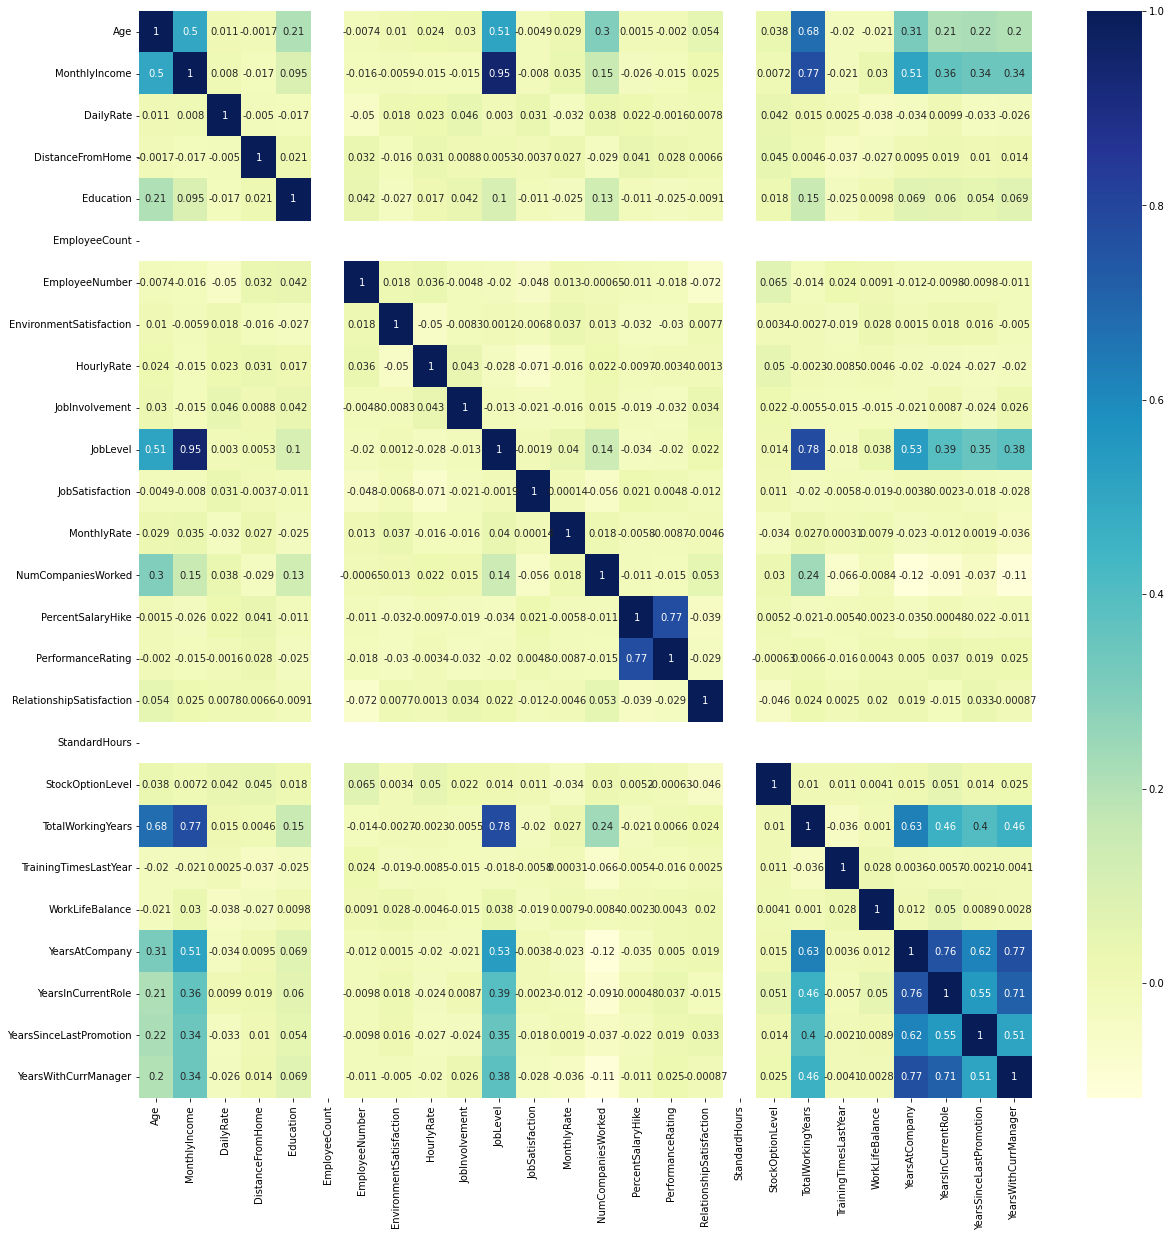

In [ ]:
import numpy as np
correlations = hr_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, cmap="YlGnBu", annot = True);

# ¡BUEN TRABAJO!